<a href="https://colab.research.google.com/github/lucioalves1973/Soul-Code-LLM/blob/main/C%C3%B3pia_de_analises_infla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Análise de Infração Países Escandinávos
##### Aluno: LÚCIO ALVES
##### Curso: BootCamp IA-LLM 2025- Soulcode
##### Tema: Analise da Estatística do Índice de Infração Comparativa

#### INICIO DO CÓDIGO ####

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import scipy.stats as sp
from itertools import combinations
import matplotlib.pyplot as plt
import re

In [ ]:
# Importando o dataset
df = pd.read_excel('Paisesescandinavos2.xls')
df.head() # Mostrando as primeiras linhas do dataset

,Mes/Ano,Alemanha,Holanda,Finlandia,Dinamarca,Suecia
0,Jan/2020,1.6,1.7,1.2,0.8,1.5
1,Fev/2020,1.7,1.3,1.1,0.7,1.3
2,Mar/2020,1.3,1.1,0.9,0.3,0.8
3,Abr/2020,0.8,1.0,-0.3,-0.1,-0.2
4,Mai/2020,0.5,1.1,-0.1,-0.2,0.1


### Comparação da inflação dos países Mes a Mes entre 2020 a 2023

In [ ]:
paises_eur = df.columns[1:].tolist() # Lista de países da Europa
comparacoes_por_mes = [] # Lista para armazenar as comparações

# Remover espaços em branco e caracteres especiais e repedição de caracteres
df['Mes/Ano'] = df['Mes/Ano'].apply(lambda x: re.match(r'([A-Za-z]+/\d{4})', x).group(1) if re.match(r'([A-Za-z]+/\d{4})', x) else x)

# Iterar sobre as linhas do DataFrame
for _, row in df.iterrows():
    mes_ano = str(row['Mes/Ano']).strip()  # Garante que é uma string limpa
    comparacoes = [] # Lista para armazenar as comparações para o mês atual

    # Comparar os valores de cada país da Europa
    for pais_eu1, pais_eu2 in combinations(paises_eur, 2):
        valor_eu1 = row[pais_eu1]
        valor_eu2 = row[pais_eu2]

        # Verificar se os valores são números e se são válidos
        if valor_eu1 > valor_eu2:
            msg = f"{pais_eu1} ({valor_eu1}) > {pais_eu2} ({valor_eu2})"
        elif valor_eu2 > valor_eu1:
            msg = f"{pais_eu2} ({valor_eu2}) > {pais_eu1} ({valor_eu1})"
        else:
            msg = f"{pais_eu1} = {pais_eu2} ({valor_eu1})"

        # Adicionar a mensagem à lista de comparações para o mês atual
        comparacoes.append(msg)

    # Adicionar as comparações para o mês atual à lista geral
    comparacoes_por_mes.append({
        'Mes/Ano': mes_ano,
        'Comparações': comparacoes
    })

# Exibir resultados corretamente
for mes in comparacoes_por_mes[:48]:
    print(f"\n--- {mes['Mes/Ano']} ---")
    for comp in mes['Comparações']:
        print(comp)



--- Jan/2020 ---
Holanda (1.7) > Alemanha (1.6)
Alemanha (1.6) > Finlandia (1.2)
Alemanha (1.6) > Dinamarca (0.8)
Alemanha (1.6) > Suecia (1.5)
Holanda (1.7) > Finlandia (1.2)
Holanda (1.7) > Dinamarca (0.8)
Holanda (1.7) > Suecia (1.5)
Finlandia (1.2) > Dinamarca (0.8)
Suecia (1.5) > Finlandia (1.2)
Suecia (1.5) > Dinamarca (0.8)

--- Fev/2020 ---
Alemanha (1.7) > Holanda (1.3)
Alemanha (1.7) > Finlandia (1.1)
Alemanha (1.7) > Dinamarca (0.7)
Alemanha (1.7) > Suecia (1.3)
Holanda (1.3) > Finlandia (1.1)
Holanda (1.3) > Dinamarca (0.7)
Holanda = Suecia (1.3)
Finlandia (1.1) > Dinamarca (0.7)
Suecia (1.3) > Finlandia (1.1)
Suecia (1.3) > Dinamarca (0.7)

--- Mar/2020 ---
Alemanha (1.3) > Holanda (1.1)
Alemanha (1.3) > Finlandia (0.9)
Alemanha (1.3) > Dinamarca (0.3)
Alemanha (1.3) > Suecia (0.8)
Holanda (1.1) > Finlandia (0.9)
Holanda (1.1) > Dinamarca (0.3)
Holanda (1.1) > Suecia (0.8)
Finlandia (0.9) > Dinamarca (0.3)
Finlandia (0.9) > Suecia (0.8)
Suecia (0.8) > Dinamarca (0.3)

---

#### Gerar Graficos de comparação de inflação dos meses

### Media de inflação de 2020 a 2023 dos paises

In [ ]:
# lista de paises
paises =['Alemanha', 'Holanda', 'Finlandia', 'Dinamarca', 'Suecia']

# criando um dicionário para armazenar as médias de inflação
medias_inflacao = {}

# calculando a média de inflação para cada país
for pais in paises:
    if pais in df.columns:
        medias_inflacao[pais]= np.mean(df[pais])
        print(f'A média de inflação do país {pais} é {medias_inflacao[pais]:.4f}')
    else:
        print(f'O país {pais} não está no dataframe')

A média de inflação do país Alemanha é 4.5521
O país Estonia não está no dataframe
A média de inflação do país Finlandia é 3.5063
O país Grecia não está no dataframe
A média de inflação do país Suecia é 4.3312


### Comparação de inflação de cada pais e gerando a comparação de inflação de cada pais  entre si e gerando Significancia estatistica entre os paises

In [ ]:
# Extraindo od dados da coluna de países
extrato = df.columns[1:].tolist()

# Gerando todas as combinações possíveis de países
ger_pares = list(combinations(extrato, 2))

# Definindo o nível de confiança desejado
niv_confianca = float(input("Digite o nível de confiança desejado (ex: 0.95): "))


# Criando um dicionário para armazenar os resultados
for paises_eu1 , paises_eu2 in ger_pares :
        dados_paises_eu1 = df[paises_eu1]
        dados_paises_eu2 = df[paises_eu2]

        t_stat, p_valor = sp.stats.ttest_ind(dados_paises_eu1, dados_paises_eu2, equal_var=False)

        medias_eu1 = dados_paises_eu1.mean()
        medias_eu2 = dados_paises_eu2.mean()


        # Verificando se há diferença significativa entre as médias
        if p_valor < niv_confianca:
            diferenca_eu = "Diferença significativa entre as médias"
        else:
            diferenca_eu = "Não há diferença significativa entre as médias"

        print(f"País 1: {paises_eu1} | País 2: {paises_eu2}")
        print(f"Média dos País: {medias_eu1:.2f} vs {medias_eu2:.2f} ")
        print(f"Valor de P: {p_valor:.4f} ---> {diferenca_eu}\n")


Digite o nível de confiança desejado (ex: 0.95): 0.05
País 1: Alemanha | País 2: Holanda
Média dos País: 4.55 vs 4.97 
Valor de P: 0.6259 ---> Não há diferença significativa entre as médias

País 1: Alemanha | País 2: Finlandia
Média dos País: 4.55 vs 3.51 
Valor de P: 0.1237 ---> Não há diferença significativa entre as médias

País 1: Alemanha | País 2: Dinamarca
Média dos País: 4.55 vs 3.56 
Valor de P: 0.1841 ---> Não há diferença significativa entre as médias

País 1: Alemanha | País 2: Suecia
Média dos País: 4.55 vs 4.33 
Valor de P: 0.7566 ---> Não há diferença significativa entre as médias

País 1: Holanda | País 2: Finlandia
Média dos País: 4.97 vs 3.51 
Valor de P: 0.0705 ---> Não há diferença significativa entre as médias

País 1: Holanda | País 2: Dinamarca
Média dos País: 4.97 vs 3.56 
Valor de P: 0.1035 ---> Não há diferença significativa entre as médias

País 1: Holanda | País 2: Suecia
Média dos País: 4.97 vs 4.33 
Valor de P: 0.4452 ---> Não há diferença significativa e

<ipython-input-5-5b29814fb490>:16: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_valor = sp.stats.ttest_ind(dados_paises_eu1, dados_paises_eu2, equal_var=False)


### Gerando o gráfico de Barras de inflação dos países

<ipython-input-6-10acd82e54ab>:19: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_valor = sp.stats.ttest_ind(dados_paises_eu1, dados_paises_eu2, equal_var=False)


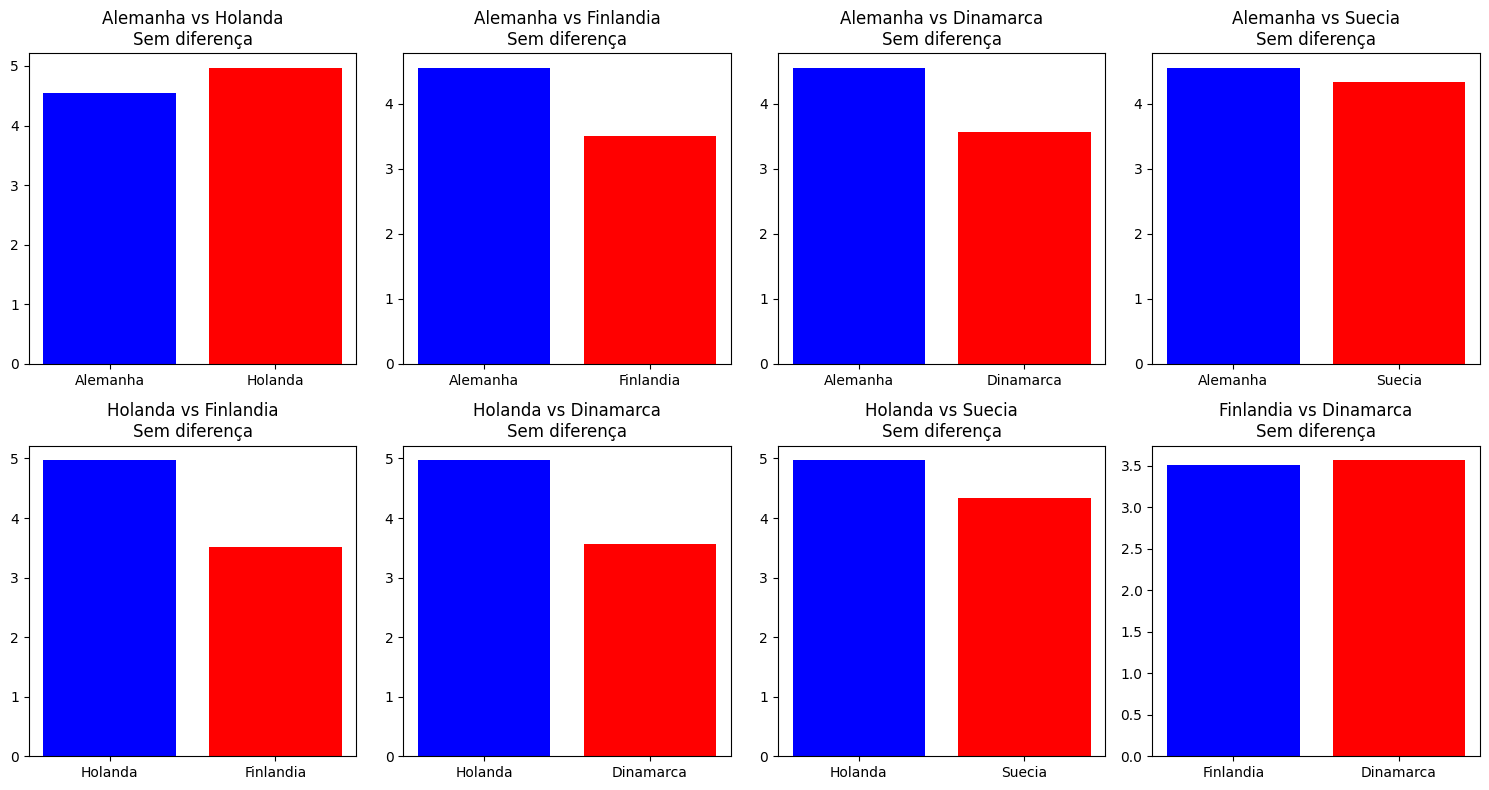

In [ ]:
# Gerando os graficos e ajustando o tamanho
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Transformando axs em uma lista para iterar sobre os subplots
axs = axs.flatten()

# Iterando sobre os pares de paises

for i, (paises_eu1, paises_eu2) in enumerate(ger_pares):

    # Verifica se todos os graficos  foram criados
    if i >= len(axs):
        break

    ax = axs[i]
    dados_paises_eu1 = df[paises_eu1]
    dados_paises_eu2 = df[paises_eu2]

    t_stat, p_valor = sp.stats.ttest_ind(dados_paises_eu1, dados_paises_eu2, equal_var=False)

    medias_eu1 = dados_paises_eu1.mean()
    medias_eu2 = dados_paises_eu2.mean()

    diferenca_eu = "Diferença significativa" if p_valor < niv_confianca else "Sem diferença"

    ax.bar([paises_eu1, paises_eu2], [medias_eu1, medias_eu2], color=['blue', 'red'])
    ax.set_title(f"{paises_eu1} vs {paises_eu2}\n{diferenca_eu}")

plt.tight_layout()
plt.show()